In [1]:
from preprocessing import *
import torch.optim as optim
from tqdm import tqdm
from mindiffusion.ddpm import DDPM
from mindiffusion.unet import NaiveUnet
device = torch.device('cuda:1')
train_data = train_data.to(device)

In [2]:
ddpm = DDPM(eps_model=NaiveUnet(1, 1, n_feat=128), betas=(1e-4, 0.02), n_T=200)
ddpm.to(device)

DDPM(
  (eps_model): NaiveUnet(
    (init_conv): Conv3(
      (main): Sequential(
        (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
      )
      (conv): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): GroupNorm(8, 128, eps=1e-05, affine=True)
        (5): ReLU()
      )
    )
    (down1): UnetDown(
      (model): Sequential(
        (0): Conv3(
          (main): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): GroupNorm(8, 128, eps=1e-05, affine=True)
            (2): ReLU()
          )
          (conv): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

In [3]:
train_data = train_data.reshape(400, 1, 1, 64, 64)

In [4]:
ddpm.load_state_dict(torch.load("ddpm_batched_200.pth"))

<All keys matched successfully>

In [5]:
def train_1_ep_ddpm(num_epoch, optim):

    print(f"Epoch {num_epoch} : ")
    ddpm.train()

    loss_ema = None
    

    train_data_tmp = train_data[torch.randperm(train_data.size()[0])]
    train_data_tmp = train_data_tmp.reshape(100, 4, 1, 64, 64)
    
    for i in tqdm(range(train_data_tmp.shape[0])):
        optim.zero_grad()
        loss = ddpm(train_data_tmp[i])
        loss.backward()
        if loss_ema is None:
            loss_ema = loss.item()
        else:
            loss_ema = 0.9 * loss_ema + 0.1 * loss.item()
        optim.step()
    print('loss',loss_ema)
    if num_epoch%20 == 1:
        ddpm.eval()
        with torch.no_grad():
            xh = ddpm.sample(3, (1, 64, 64), device)
            print(xh.shape)
            tensor_to_picture(xh[0].detach().cpu().numpy()[0])
            tensor_to_picture(xh[1].detach().cpu().numpy()[0])
            tensor_to_picture(xh[2].detach().cpu().numpy()[0])

    # save model
    torch.save(ddpm.state_dict(), f"./ddpm_batched_200.pth")

In [6]:
def train_ddpm(epoch, lr, lr_decay, reg):
    for i in range(epoch):
        
        optim = torch.optim.SGD(ddpm.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        train_1_ep_ddpm(i, optim)

Epoch 0 : 


100%|██████████| 100/100 [00:05<00:00, 16.74it/s]


loss 0.2520815071978869
Epoch 1 : 


100%|██████████| 100/100 [00:05<00:00, 16.94it/s]


loss 0.261025074339442
torch.Size([3, 1, 64, 64])


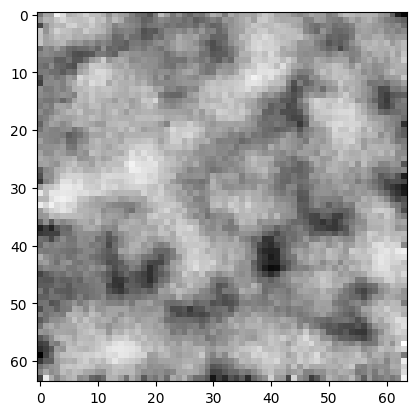

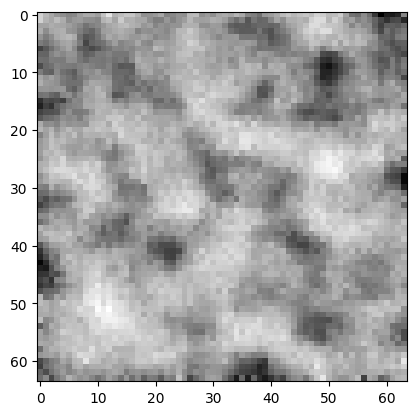

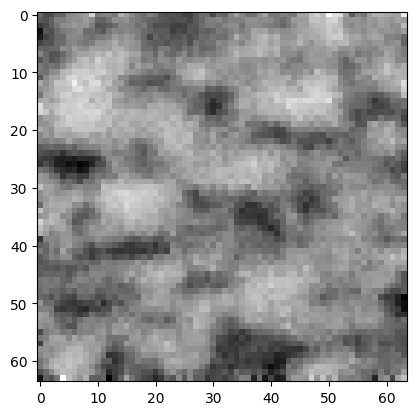

Epoch 2 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.19774410915325122
Epoch 3 : 


100%|██████████| 100/100 [00:05<00:00, 16.96it/s]


loss 0.2085407518195591
Epoch 4 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.18781695568038573
Epoch 5 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.22185290290154214
Epoch 6 : 


100%|██████████| 100/100 [00:05<00:00, 16.96it/s]


loss 0.18138266628371016
Epoch 7 : 


100%|██████████| 100/100 [00:06<00:00, 16.32it/s]


loss 0.19212592296924932
Epoch 8 : 


100%|██████████| 100/100 [00:06<00:00, 16.56it/s]


loss 0.20811037390945922
Epoch 9 : 


100%|██████████| 100/100 [00:06<00:00, 15.86it/s]


loss 0.19883681898839328
Epoch 10 : 


100%|██████████| 100/100 [00:06<00:00, 16.16it/s]


loss 0.17999260452049903
Epoch 11 : 


100%|██████████| 100/100 [00:06<00:00, 15.69it/s]


loss 0.17588038716973536
Epoch 12 : 


100%|██████████| 100/100 [00:06<00:00, 16.53it/s]


loss 0.19078905733378365
Epoch 13 : 


100%|██████████| 100/100 [00:06<00:00, 16.29it/s]


loss 0.15942310609942897
Epoch 14 : 


100%|██████████| 100/100 [00:06<00:00, 16.62it/s]


loss 0.22445537991465064
Epoch 15 : 


100%|██████████| 100/100 [00:06<00:00, 15.98it/s]


loss 0.16447826799500787
Epoch 16 : 


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


loss 0.22946419201822582
Epoch 17 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.1850605003386009
Epoch 18 : 


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


loss 0.15625275420638818
Epoch 19 : 


100%|██████████| 100/100 [00:06<00:00, 16.23it/s]


loss 0.15996128591192546
Epoch 20 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.2333872273799072
Epoch 21 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.1879114068200892
torch.Size([3, 1, 64, 64])


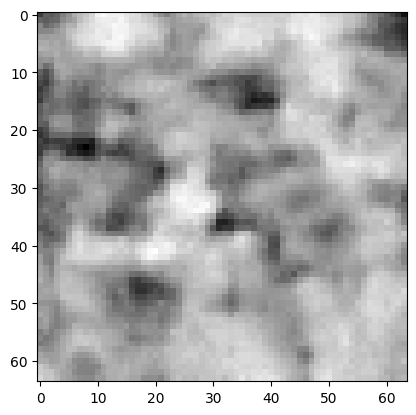

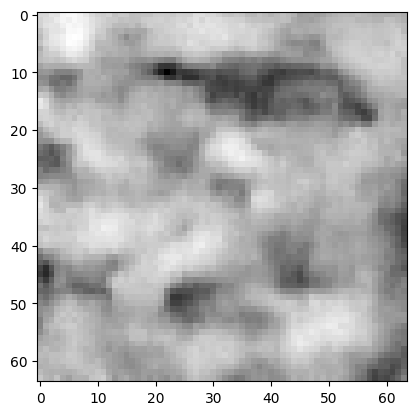

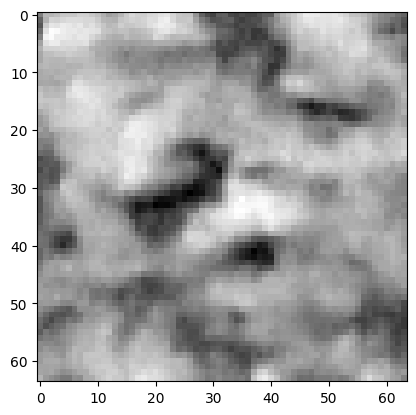

Epoch 22 : 


100%|██████████| 100/100 [00:06<00:00, 16.31it/s]


loss 0.20874312547118434
Epoch 23 : 


100%|██████████| 100/100 [00:05<00:00, 16.70it/s]


loss 0.20575009536364902
Epoch 24 : 


100%|██████████| 100/100 [00:05<00:00, 17.39it/s]


loss 0.16395957790594734
Epoch 25 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.1636623769455297
Epoch 26 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.17153123770716724
Epoch 27 : 


100%|██████████| 100/100 [00:06<00:00, 16.62it/s]


loss 0.15302338576990182
Epoch 28 : 


100%|██████████| 100/100 [00:06<00:00, 16.59it/s]


loss 0.1845125861589175
Epoch 29 : 


100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


loss 0.15859198027933094
Epoch 30 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.1851544613887807
Epoch 31 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.16804282081374297
Epoch 32 : 


100%|██████████| 100/100 [00:06<00:00, 15.53it/s]


loss 0.1682616257246103
Epoch 33 : 


100%|██████████| 100/100 [00:06<00:00, 16.45it/s]


loss 0.17759456120970035
Epoch 34 : 


100%|██████████| 100/100 [00:05<00:00, 16.98it/s]


loss 0.15954969521530762
Epoch 35 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.17277917071789076
Epoch 36 : 


100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


loss 0.20181482063663206
Epoch 37 : 


100%|██████████| 100/100 [00:05<00:00, 16.78it/s]


loss 0.20220516455812204
Epoch 38 : 


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


loss 0.15746844240813335
Epoch 39 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.1500376837803169
Epoch 40 : 


100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


loss 0.18013628956323113
Epoch 41 : 


100%|██████████| 100/100 [00:06<00:00, 16.12it/s]


loss 0.15120934893973315
torch.Size([3, 1, 64, 64])


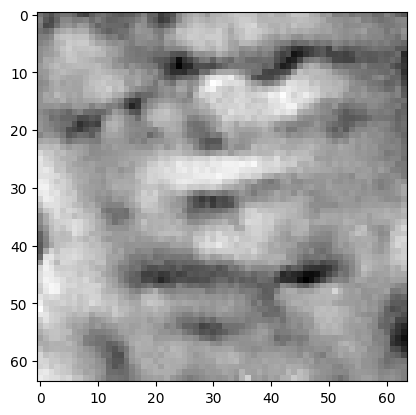

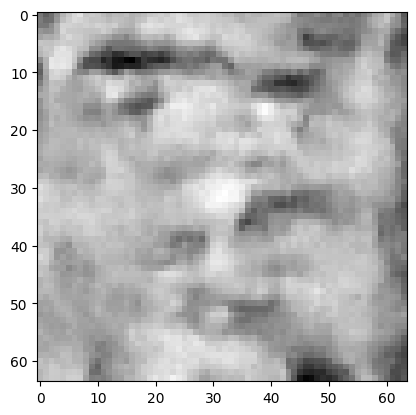

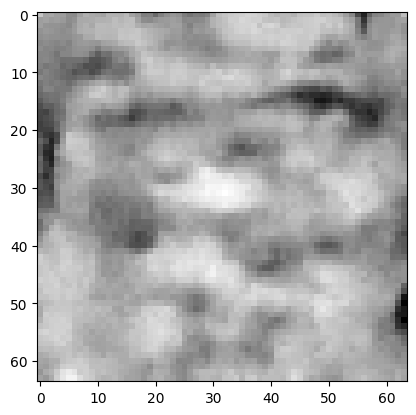

Epoch 42 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.1603539124425783
Epoch 43 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.16945602837636878
Epoch 44 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.15970926270433608
Epoch 45 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.15918829320283806
Epoch 46 : 


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


loss 0.2007211861680139
Epoch 47 : 


100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


loss 0.14798088686552582
Epoch 48 : 


100%|██████████| 100/100 [00:06<00:00, 16.23it/s]


loss 0.17334122780766842
Epoch 49 : 


100%|██████████| 100/100 [00:06<00:00, 16.67it/s]


loss 0.18609374556389477
Epoch 50 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.15756918173665185
Epoch 51 : 


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


loss 0.17372282964988664
Epoch 52 : 


100%|██████████| 100/100 [00:05<00:00, 16.80it/s]


loss 0.1529568860523979
Epoch 53 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.1623628032884833
Epoch 54 : 


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


loss 0.1598321939111606
Epoch 55 : 


100%|██████████| 100/100 [00:06<00:00, 16.59it/s]


loss 0.13818031030777922
Epoch 56 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.14050464808484064
Epoch 57 : 


100%|██████████| 100/100 [00:06<00:00, 16.12it/s]


loss 0.16356185332212944
Epoch 58 : 


100%|██████████| 100/100 [00:06<00:00, 16.37it/s]


loss 0.17962908395242713
Epoch 59 : 


100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


loss 0.18709894846828065
Epoch 60 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.1772641385687018
Epoch 61 : 


100%|██████████| 100/100 [00:06<00:00, 15.90it/s]


loss 0.1987183264386393
torch.Size([3, 1, 64, 64])


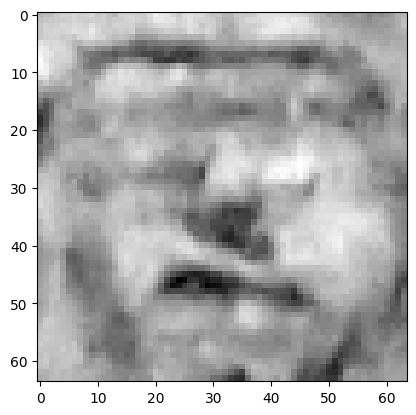

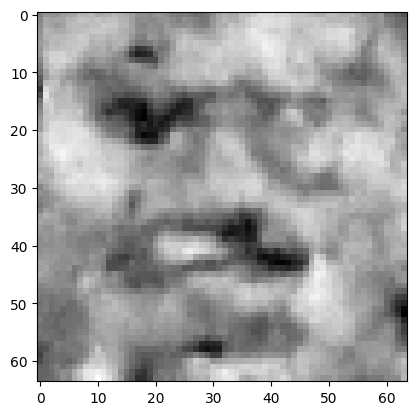

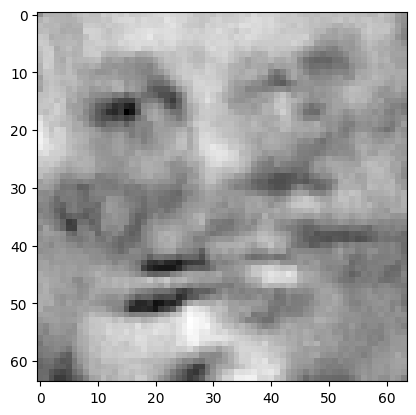

Epoch 62 : 


100%|██████████| 100/100 [00:06<00:00, 16.52it/s]


loss 0.18174023925812144
Epoch 63 : 


100%|██████████| 100/100 [00:06<00:00, 16.47it/s]


loss 0.14894692838732582
Epoch 64 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.17545302567924648
Epoch 65 : 


100%|██████████| 100/100 [00:06<00:00, 16.40it/s]


loss 0.16518964116725632
Epoch 66 : 


100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


loss 0.22053890504732998
Epoch 67 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.15490163549301034
Epoch 68 : 


100%|██████████| 100/100 [00:05<00:00, 17.52it/s]


loss 0.15822399565672052
Epoch 69 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.16338174532336944
Epoch 70 : 


100%|██████████| 100/100 [00:06<00:00, 16.12it/s]


loss 0.12735603055863562
Epoch 71 : 


100%|██████████| 100/100 [00:06<00:00, 15.96it/s]


loss 0.16748447273433967
Epoch 72 : 


100%|██████████| 100/100 [00:06<00:00, 16.65it/s]


loss 0.15986121096085545
Epoch 73 : 


100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


loss 0.17279485799615177
Epoch 74 : 


100%|██████████| 100/100 [00:06<00:00, 15.78it/s]


loss 0.15300987271223185
Epoch 75 : 


100%|██████████| 100/100 [00:06<00:00, 16.40it/s]


loss 0.16924160251440928
Epoch 76 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.16545877193826436
Epoch 77 : 


100%|██████████| 100/100 [00:06<00:00, 16.23it/s]


loss 0.15773924037136727
Epoch 78 : 


100%|██████████| 100/100 [00:05<00:00, 16.79it/s]


loss 0.15921405245323336
Epoch 79 : 


100%|██████████| 100/100 [00:06<00:00, 16.38it/s]


loss 0.16943134474073204
Epoch 80 : 


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


loss 0.14993592717976023
Epoch 81 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.21409463119463815
torch.Size([3, 1, 64, 64])


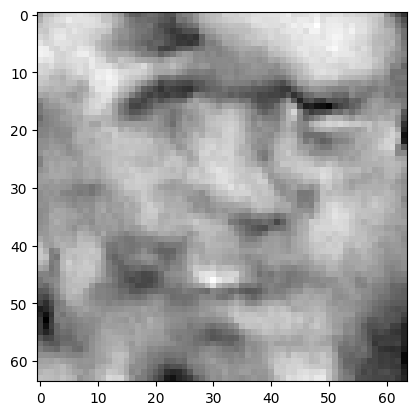

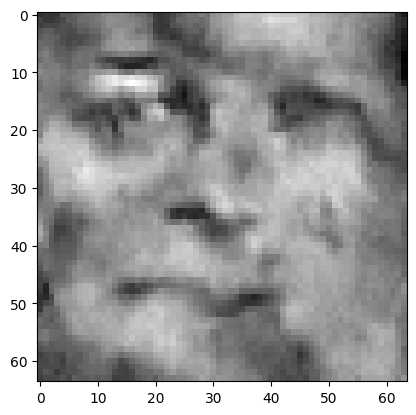

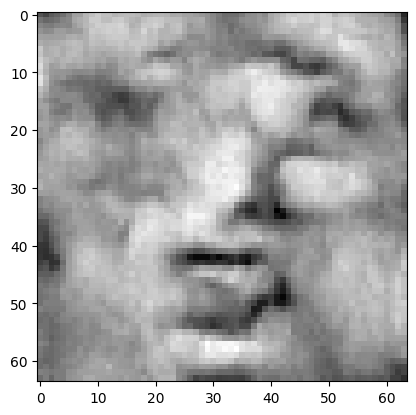

Epoch 82 : 


100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


loss 0.17981238208091993
Epoch 83 : 


100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


loss 0.1716808871594371
Epoch 84 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.17437000281247012
Epoch 85 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.14468433403964748
Epoch 86 : 


100%|██████████| 100/100 [00:05<00:00, 17.12it/s]


loss 0.15740670325799075
Epoch 87 : 


100%|██████████| 100/100 [00:06<00:00, 16.47it/s]


loss 0.17208758878485036
Epoch 88 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.1288320552806709
Epoch 89 : 


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


loss 0.17070213966592307
Epoch 90 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.1503857068549852
Epoch 91 : 


100%|██████████| 100/100 [00:06<00:00, 16.56it/s]


loss 0.16159724886793222
Epoch 92 : 


 73%|███████▎  | 73/100 [00:04<00:01, 17.19it/s]

In [ ]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 100/100 [00:06<00:00, 15.32it/s]


loss 0.16697453040243249
Epoch 1 : 


100%|██████████| 100/100 [00:06<00:00, 16.42it/s]


loss 0.14175198799307598
torch.Size([3, 1, 64, 64])


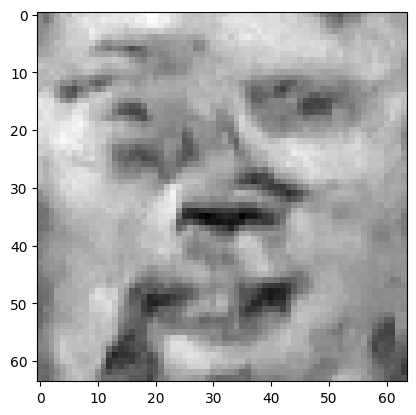

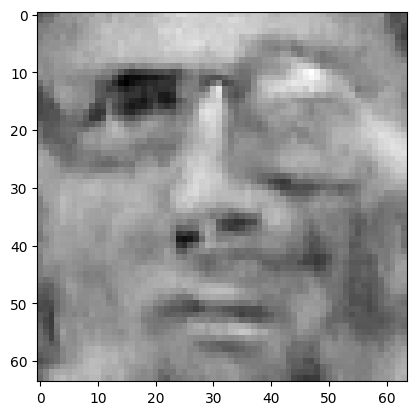

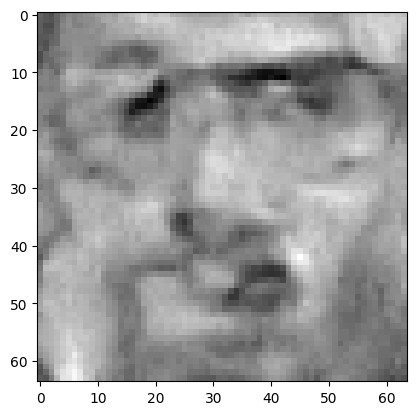

Epoch 2 : 


100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


loss 0.10409795006083615
Epoch 3 : 


100%|██████████| 100/100 [00:05<00:00, 17.18it/s]


loss 0.14862648915155707
Epoch 4 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.17064292867922665
Epoch 5 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.14480724428940472
Epoch 6 : 


100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


loss 0.14415758025720962
Epoch 7 : 


100%|██████████| 100/100 [00:06<00:00, 15.98it/s]


loss 0.15300018123279002
Epoch 8 : 


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


loss 0.1447520511223763
Epoch 9 : 


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


loss 0.12392150155092882
Epoch 10 : 


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


loss 0.13708381533492925
Epoch 11 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.133179335226878
Epoch 12 : 


100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


loss 0.14499637429958676
Epoch 13 : 


100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


loss 0.18482138310102347
Epoch 14 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.13559638168430904
Epoch 15 : 


100%|██████████| 100/100 [00:06<00:00, 16.18it/s]


loss 0.13983208811313333
Epoch 16 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.16326319748513812
Epoch 17 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.15296943373129337
Epoch 18 : 


100%|██████████| 100/100 [00:06<00:00, 16.40it/s]


loss 0.1365142129957701
Epoch 19 : 


100%|██████████| 100/100 [00:06<00:00, 16.65it/s]


loss 0.18814913565211178
Epoch 20 : 


100%|██████████| 100/100 [00:05<00:00, 16.68it/s]


loss 0.1450601015068447
Epoch 21 : 


100%|██████████| 100/100 [00:05<00:00, 16.85it/s]


loss 0.1691305922322376
torch.Size([3, 1, 64, 64])


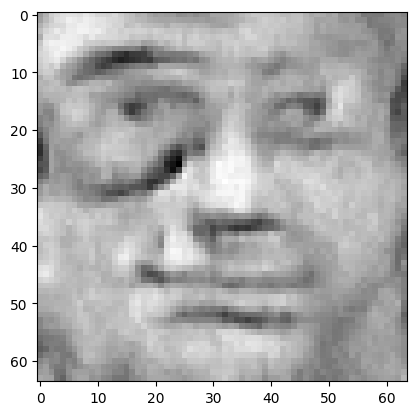

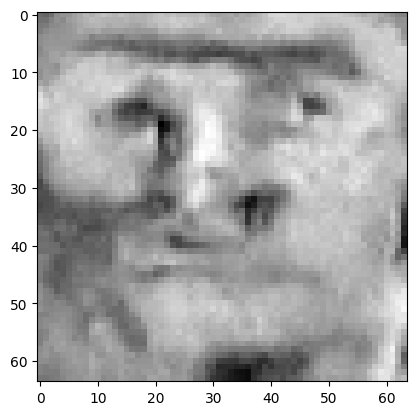

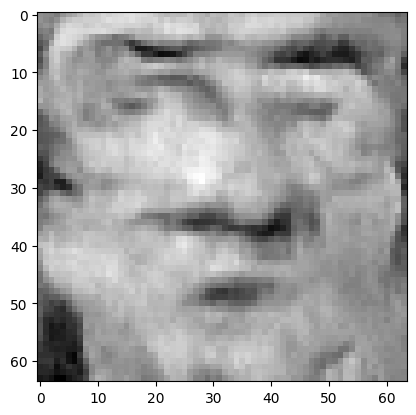

Epoch 22 : 


100%|██████████| 100/100 [00:06<00:00, 16.45it/s]


loss 0.14890054286954496
Epoch 23 : 


100%|██████████| 100/100 [00:06<00:00, 16.22it/s]


loss 0.175056618355816
Epoch 24 : 


100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


loss 0.12379319209496321
Epoch 25 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.15341978600017128
Epoch 26 : 


100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


loss 0.16972051888724224
Epoch 27 : 


100%|██████████| 100/100 [00:06<00:00, 16.29it/s]


loss 0.14777598564914063
Epoch 28 : 


100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


loss 0.1676666992062038
Epoch 29 : 


100%|██████████| 100/100 [00:06<00:00, 16.38it/s]


loss 0.12873630776744277
Epoch 30 : 


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


loss 0.15700103496459802
Epoch 31 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.14185724746655326
Epoch 32 : 


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


loss 0.178260954885553
Epoch 33 : 


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


loss 0.14727381027013386
Epoch 34 : 


100%|██████████| 100/100 [00:05<00:00, 16.74it/s]


loss 0.15775314392944656
Epoch 35 : 


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


loss 0.14285019734861992
Epoch 36 : 


100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


loss 0.15687716983365282
Epoch 37 : 


100%|██████████| 100/100 [00:05<00:00, 17.02it/s]


loss 0.15065264153247127
Epoch 38 : 


100%|██████████| 100/100 [00:06<00:00, 16.47it/s]


loss 0.11591059797213053
Epoch 39 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.13829366604904275
Epoch 40 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.1250229983281248
Epoch 41 : 


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


loss 0.13681201371629592
torch.Size([3, 1, 64, 64])


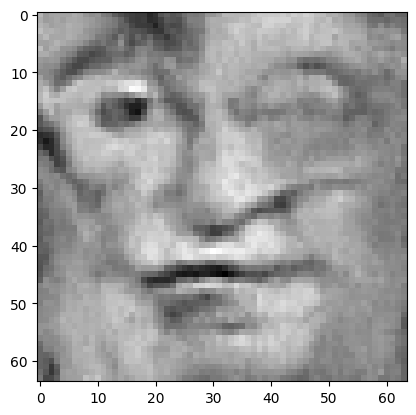

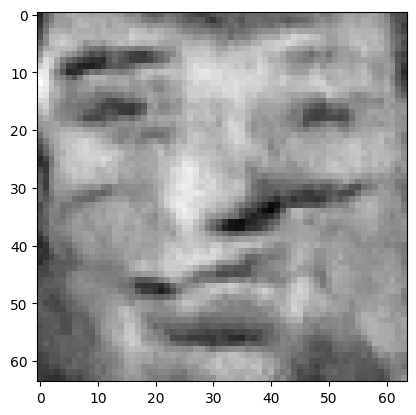

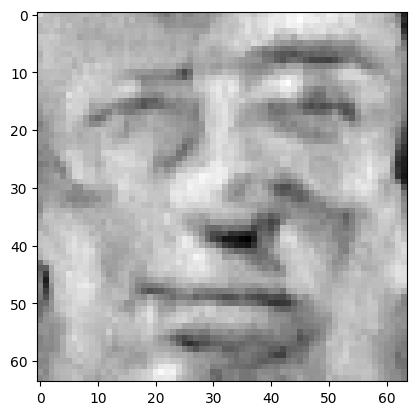

Epoch 42 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.14746237571637966
Epoch 43 : 


100%|██████████| 100/100 [00:05<00:00, 16.70it/s]


loss 0.16748097320368818
Epoch 44 : 


100%|██████████| 100/100 [00:05<00:00, 16.79it/s]


loss 0.12842971993547792
Epoch 45 : 


100%|██████████| 100/100 [00:06<00:00, 16.38it/s]


loss 0.13805558116673794
Epoch 46 : 


100%|██████████| 100/100 [00:06<00:00, 15.66it/s]


loss 0.14136771826536831
Epoch 47 : 


100%|██████████| 100/100 [00:06<00:00, 15.96it/s]


loss 0.13161584664201934
Epoch 48 : 


100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


loss 0.1257317250778095
Epoch 49 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.15524437016161657
Epoch 50 : 


100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


loss 0.15444891770386865
Epoch 51 : 


100%|██████████| 100/100 [00:05<00:00, 17.06it/s]


loss 0.1071920830151915
Epoch 52 : 


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


loss 0.16956125601592392
Epoch 53 : 


100%|██████████| 100/100 [00:06<00:00, 16.16it/s]


loss 0.1711256222943555
Epoch 54 : 


100%|██████████| 100/100 [00:05<00:00, 16.67it/s]


loss 0.18972421148603724
Epoch 55 : 


100%|██████████| 100/100 [00:06<00:00, 16.60it/s]


loss 0.14333719306442497
Epoch 56 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.1558051290167228
Epoch 57 : 


100%|██████████| 100/100 [00:06<00:00, 16.44it/s]


loss 0.15480472784758842
Epoch 58 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.1578803689388899
Epoch 59 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.14591724516041502
Epoch 60 : 


100%|██████████| 100/100 [00:06<00:00, 16.47it/s]


loss 0.11840624946869009
Epoch 61 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.14997610847697718
torch.Size([3, 1, 64, 64])


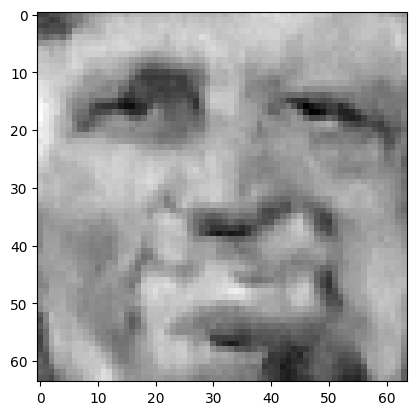

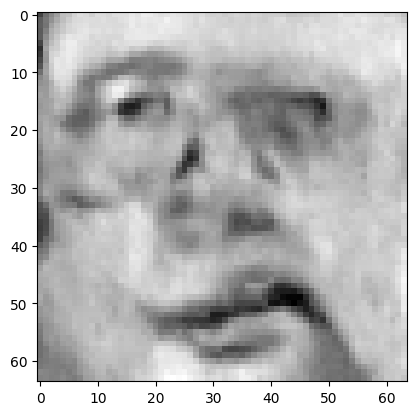

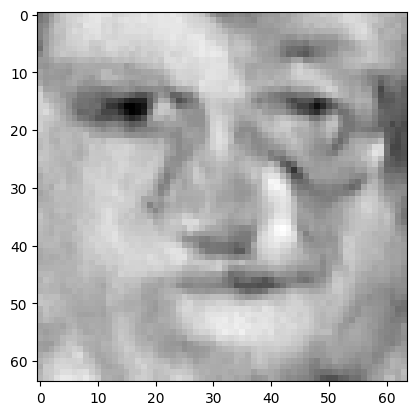

Epoch 62 : 


100%|██████████| 100/100 [00:05<00:00, 16.80it/s]


loss 0.13568171618516417
Epoch 63 : 


100%|██████████| 100/100 [00:06<00:00, 16.24it/s]


loss 0.15235502912781634
Epoch 64 : 


100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


loss 0.12479210569453279
Epoch 65 : 


100%|██████████| 100/100 [00:06<00:00, 15.85it/s]


loss 0.16377754945579448
Epoch 66 : 


100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


loss 0.11752632294331836
Epoch 67 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.13960088953213753
Epoch 68 : 


100%|██████████| 100/100 [00:06<00:00, 16.63it/s]


loss 0.13392680206936314
Epoch 69 : 


100%|██████████| 100/100 [00:06<00:00, 16.56it/s]


loss 0.11046922174754839
Epoch 70 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.11785499552379813
Epoch 71 : 


100%|██████████| 100/100 [00:06<00:00, 16.60it/s]


loss 0.13182456632206968
Epoch 72 : 


100%|██████████| 100/100 [00:06<00:00, 16.52it/s]


loss 0.17434574497204952
Epoch 73 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.13937964637536723
Epoch 74 : 


100%|██████████| 100/100 [00:06<00:00, 16.65it/s]


loss 0.14140862422188258
Epoch 75 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.14216228958171087
Epoch 76 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.15208667135424464
Epoch 77 : 


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


loss 0.15125096242878103
Epoch 78 : 


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


loss 0.11561020859950413
Epoch 79 : 


100%|██████████| 100/100 [00:05<00:00, 16.76it/s]


loss 0.13883797288902608
Epoch 80 : 


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


loss 0.1307560876069914
Epoch 81 : 


100%|██████████| 100/100 [00:06<00:00, 15.70it/s]


loss 0.1229440764804704
torch.Size([3, 1, 64, 64])


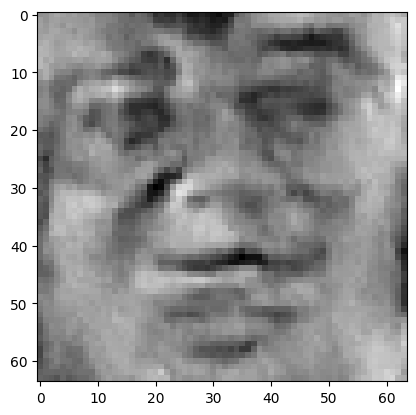

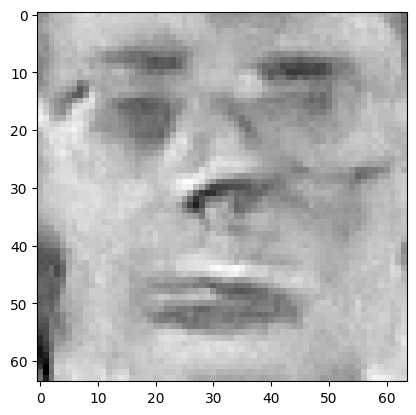

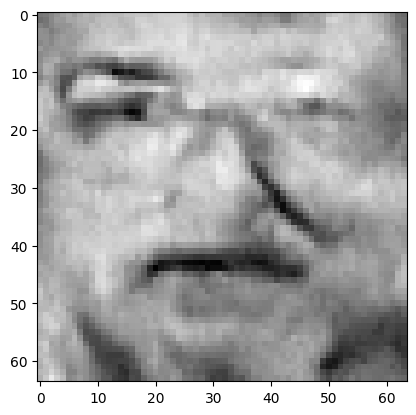

Epoch 82 : 


100%|██████████| 100/100 [00:06<00:00, 16.38it/s]


loss 0.13306393360565405
Epoch 83 : 


100%|██████████| 100/100 [00:05<00:00, 16.75it/s]


loss 0.17698740523076278
Epoch 84 : 


100%|██████████| 100/100 [00:06<00:00, 16.59it/s]


loss 0.11911086770422911
Epoch 85 : 


100%|██████████| 100/100 [00:05<00:00, 16.88it/s]


loss 0.1259781170889902
Epoch 86 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.1337239813353887
Epoch 87 : 


100%|██████████| 100/100 [00:06<00:00, 16.31it/s]


loss 0.1922182433663172
Epoch 88 : 


100%|██████████| 100/100 [00:06<00:00, 16.44it/s]


loss 0.1432213352666916
Epoch 89 : 


100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


loss 0.139419111361562
Epoch 90 : 


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


loss 0.15479432365786486
Epoch 91 : 


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


loss 0.16169672708530036
Epoch 92 : 


100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


loss 0.12379007488275914
Epoch 93 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.15758063912970388
Epoch 94 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.1630639174092467
Epoch 95 : 


100%|██████████| 100/100 [00:05<00:00, 17.09it/s]


loss 0.13691430948499883
Epoch 96 : 


100%|██████████| 100/100 [00:06<00:00, 15.94it/s]


loss 0.13419820663578946
Epoch 97 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.13505692473818168
Epoch 98 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.1328259251491567
Epoch 99 : 


100%|██████████| 100/100 [00:06<00:00, 16.37it/s]


loss 0.14907116250922517


In [7]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


loss 0.1324987803331763
Epoch 1 : 


100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


loss 0.12336590443110802
torch.Size([3, 1, 64, 64])


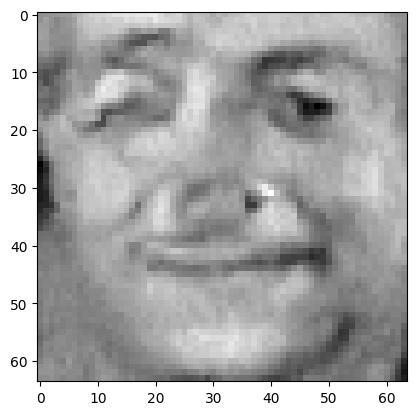

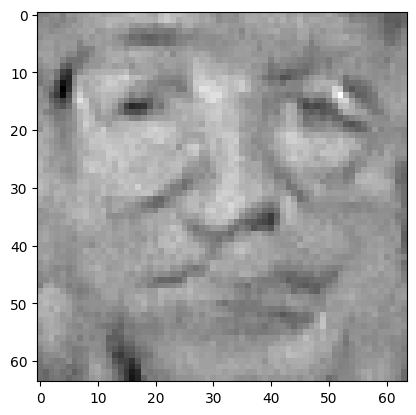

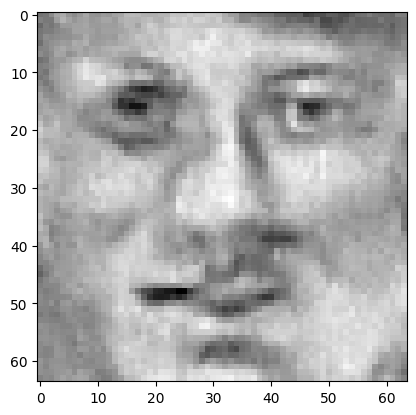

Epoch 2 : 


100%|██████████| 100/100 [00:06<00:00, 16.40it/s]


loss 0.1534265018018247
Epoch 3 : 


100%|██████████| 100/100 [00:06<00:00, 16.63it/s]


loss 0.11613743498112819
Epoch 4 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.16432470902743676
Epoch 5 : 


100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


loss 0.13413430528322245
Epoch 6 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.11230840885524992
Epoch 7 : 


100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


loss 0.11816862644523549
Epoch 8 : 


100%|██████████| 100/100 [00:05<00:00, 16.73it/s]


loss 0.14491876692816416
Epoch 9 : 


100%|██████████| 100/100 [00:06<00:00, 15.67it/s]


loss 0.12328170735025672
Epoch 10 : 


100%|██████████| 100/100 [00:05<00:00, 16.90it/s]


loss 0.17596377619054865
Epoch 11 : 


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


loss 0.13704675025450888
Epoch 12 : 


100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


loss 0.12563476171283425
Epoch 13 : 


100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


loss 0.12993889424820823
Epoch 14 : 


100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


loss 0.1396782345406481
Epoch 15 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.17918599036526225
Epoch 16 : 


100%|██████████| 100/100 [00:06<00:00, 16.49it/s]


loss 0.15246821379316425
Epoch 17 : 


100%|██████████| 100/100 [00:06<00:00, 15.52it/s]


loss 0.13139047112416455
Epoch 18 : 


100%|██████████| 100/100 [00:06<00:00, 16.42it/s]


loss 0.15745930678263098
Epoch 19 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.13369157875624701
Epoch 20 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.15171284317363226
Epoch 21 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.1322702165676288
torch.Size([3, 1, 64, 64])


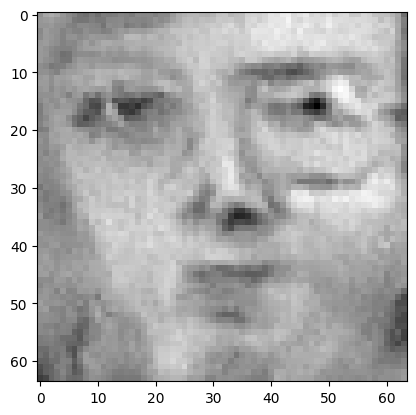

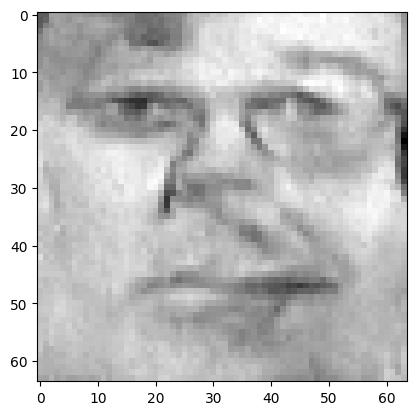

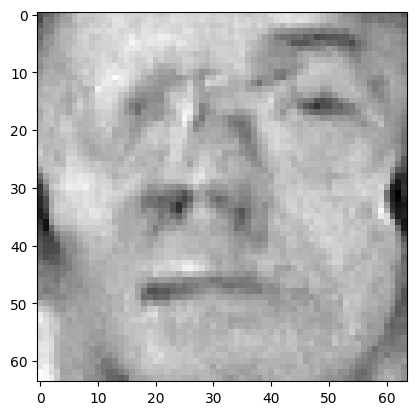

Epoch 22 : 


100%|██████████| 100/100 [00:06<00:00, 15.59it/s]


loss 0.178262379344653
Epoch 23 : 


100%|██████████| 100/100 [00:06<00:00, 16.62it/s]


loss 0.13714460465605927
Epoch 24 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.14698823734038335
Epoch 25 : 


100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


loss 0.17811529767785445
Epoch 26 : 


100%|██████████| 100/100 [00:05<00:00, 16.93it/s]


loss 0.12504348671147705
Epoch 27 : 


100%|██████████| 100/100 [00:06<00:00, 16.22it/s]


loss 0.14688434814443982
Epoch 28 : 


100%|██████████| 100/100 [00:05<00:00, 16.83it/s]


loss 0.14609446571599233
Epoch 29 : 


100%|██████████| 100/100 [00:06<00:00, 16.18it/s]


loss 0.15404013986950596
Epoch 30 : 


100%|██████████| 100/100 [00:05<00:00, 16.82it/s]


loss 0.14087357632932546
Epoch 31 : 


100%|██████████| 100/100 [00:05<00:00, 16.75it/s]


loss 0.10848346649271592
Epoch 32 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.15407884054170307
Epoch 33 : 


100%|██████████| 100/100 [00:06<00:00, 16.53it/s]


loss 0.15548677438782202
Epoch 34 : 


100%|██████████| 100/100 [00:05<00:00, 16.80it/s]


loss 0.13390884970176686
Epoch 35 : 


100%|██████████| 100/100 [00:06<00:00, 15.90it/s]


loss 0.13031846684153112
Epoch 36 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.19443035645124884
Epoch 37 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.11426195810616079
Epoch 38 : 


100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


loss 0.1323587337488748
Epoch 39 : 


100%|██████████| 100/100 [00:05<00:00, 17.19it/s]


loss 0.17705224200827444
Epoch 40 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.15273168448110544
Epoch 41 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.1437608323327753
torch.Size([3, 1, 64, 64])


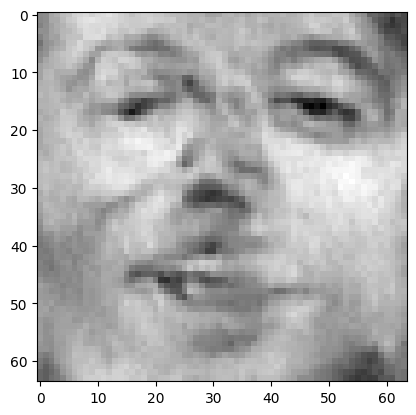

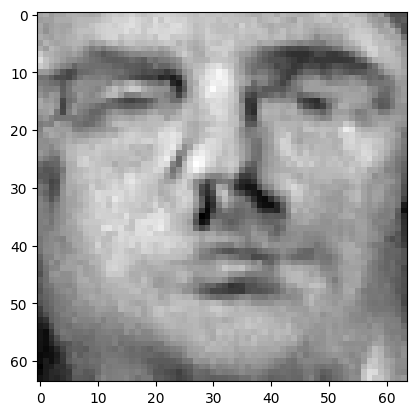

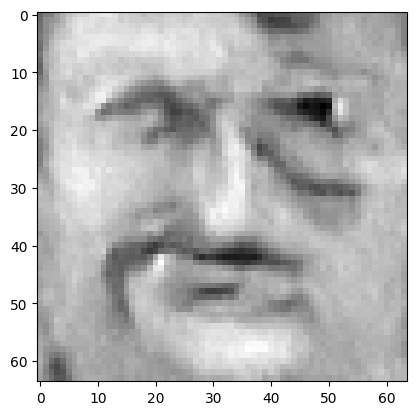

Epoch 42 : 


100%|██████████| 100/100 [00:06<00:00, 16.54it/s]


loss 0.17483590612036726
Epoch 43 : 


100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


loss 0.13935873219821115
Epoch 44 : 


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


loss 0.16204424255109423
Epoch 45 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.12086840667201906
Epoch 46 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.1484095480375677
Epoch 47 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.175314444776384
Epoch 48 : 


100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


loss 0.13995179779123784
Epoch 49 : 


100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


loss 0.14473063905794076
Epoch 50 : 


100%|██████████| 100/100 [00:06<00:00, 15.67it/s]


loss 0.16468747423252073
Epoch 51 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.1530787342922568
Epoch 52 : 


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


loss 0.14456680177639541
Epoch 53 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.1514323366755449
Epoch 54 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.13714272662097488
Epoch 55 : 


100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


loss 0.16007471298852852
Epoch 56 : 


100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


loss 0.1565075405024502
Epoch 57 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.14860973419362114
Epoch 58 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.1381778750887098
Epoch 59 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.15586329912920943
Epoch 60 : 


100%|██████████| 100/100 [00:05<00:00, 16.74it/s]


loss 0.15759490191727552
Epoch 61 : 


100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


loss 0.1645145360694398
torch.Size([3, 1, 64, 64])


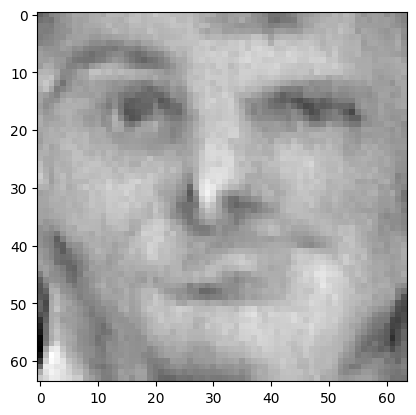

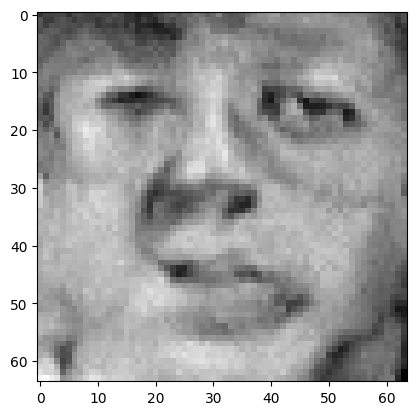

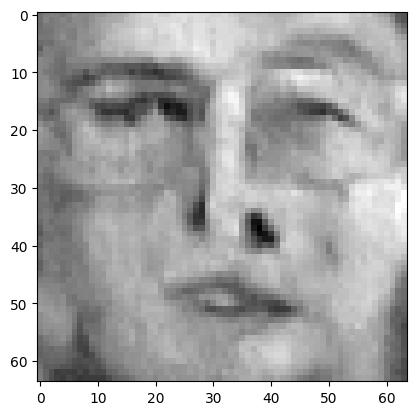

Epoch 62 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.13576619361460393
Epoch 63 : 


100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


loss 0.11726892855328123
Epoch 64 : 


100%|██████████| 100/100 [00:06<00:00, 15.46it/s]


loss 0.1140908436908474
Epoch 65 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.1498127909100214
Epoch 66 : 


100%|██████████| 100/100 [00:06<00:00, 15.81it/s]


loss 0.13813447766314738
Epoch 67 : 


100%|██████████| 100/100 [00:06<00:00, 15.84it/s]


loss 0.11600824733781222
Epoch 68 : 


100%|██████████| 100/100 [00:06<00:00, 15.32it/s]


loss 0.1701891100791596
Epoch 69 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.14575127423545423
Epoch 70 : 


100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


loss 0.11971038547075774
Epoch 71 : 


100%|██████████| 100/100 [00:06<00:00, 15.49it/s]


loss 0.1315829127207897
Epoch 72 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.14168708270991995
Epoch 73 : 


100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


loss 0.13569412737695102
Epoch 74 : 


100%|██████████| 100/100 [00:06<00:00, 15.69it/s]


loss 0.1635737400777934
Epoch 75 : 


100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


loss 0.11716093138648623
Epoch 76 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.1359559446047053
Epoch 77 : 


100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


loss 0.1585043201776486
Epoch 78 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.1466333473948612
Epoch 79 : 


100%|██████████| 100/100 [00:06<00:00, 15.73it/s]


loss 0.14543538941866765
Epoch 80 : 


100%|██████████| 100/100 [00:06<00:00, 15.74it/s]


loss 0.13984030635847366
Epoch 81 : 


100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


loss 0.1603572518676358
torch.Size([3, 1, 64, 64])


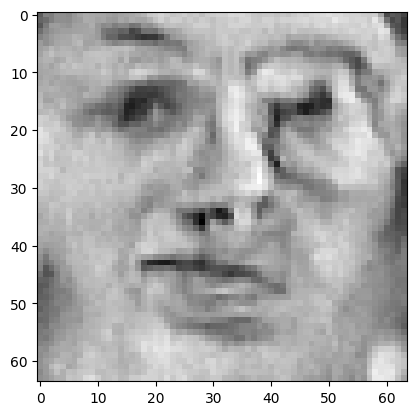

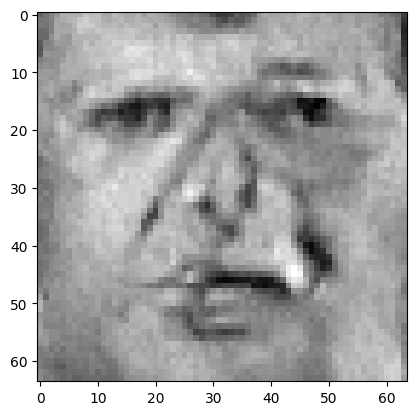

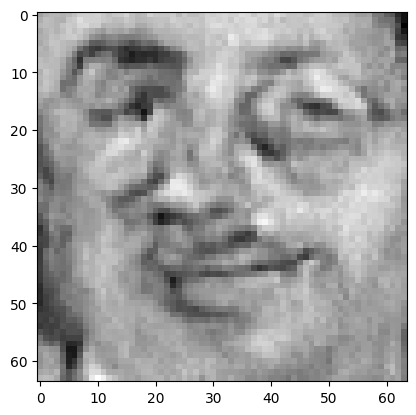

Epoch 82 : 


100%|██████████| 100/100 [00:06<00:00, 15.85it/s]


loss 0.12904592893061215
Epoch 83 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.13026068109240158
Epoch 84 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.19171951315923044
Epoch 85 : 


100%|██████████| 100/100 [00:06<00:00, 15.49it/s]


loss 0.1521062962553355
Epoch 86 : 


100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


loss 0.11347308001050779
Epoch 87 : 


100%|██████████| 100/100 [00:06<00:00, 16.22it/s]


loss 0.14921210459785042
Epoch 88 : 


100%|██████████| 100/100 [00:06<00:00, 16.29it/s]


loss 0.17354468811265428
Epoch 89 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.12864851407164157
Epoch 90 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.15131252505404527
Epoch 91 : 


100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


loss 0.13997390512318603
Epoch 92 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.11283431436409551
Epoch 93 : 


100%|██████████| 100/100 [00:06<00:00, 15.56it/s]


loss 0.13421790034372874
Epoch 94 : 


100%|██████████| 100/100 [00:06<00:00, 16.41it/s]


loss 0.16960803250750403
Epoch 95 : 


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


loss 0.12809368611059646
Epoch 96 : 


100%|██████████| 100/100 [00:06<00:00, 15.53it/s]


loss 0.11751714278604966
Epoch 97 : 


100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


loss 0.14473245711678195
Epoch 98 : 


100%|██████████| 100/100 [00:06<00:00, 16.41it/s]


loss 0.15077745800527503
Epoch 99 : 


100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


loss 0.11550862035242708
Epoch 100 : 


100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


loss 0.16151371228357944
Epoch 101 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.11596317134814106
torch.Size([3, 1, 64, 64])


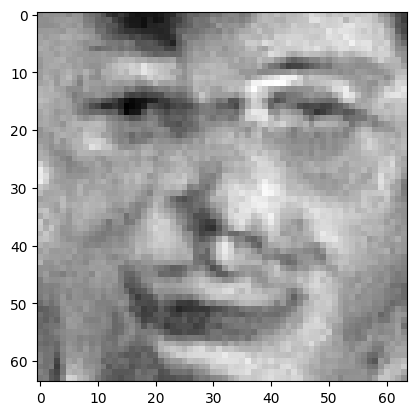

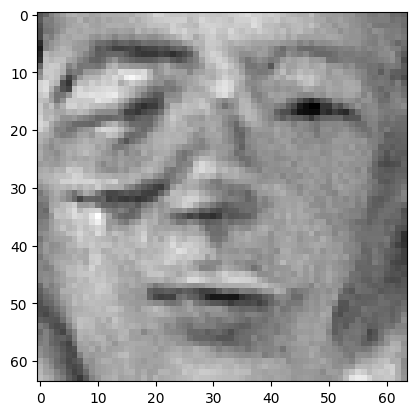

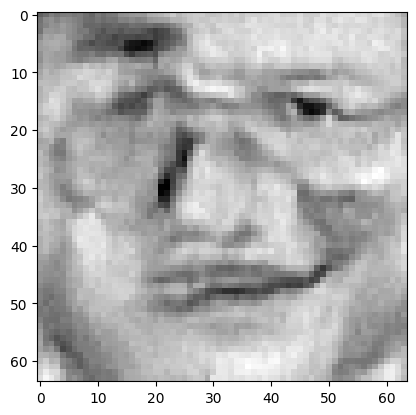

Epoch 102 : 


100%|██████████| 100/100 [00:06<00:00, 16.51it/s]


loss 0.1535335870849975
Epoch 103 : 


100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


loss 0.12967758077430322
Epoch 104 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.11416574030396537
Epoch 105 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.12973838089935613
Epoch 106 : 


100%|██████████| 100/100 [00:06<00:00, 16.60it/s]


loss 0.14096915729079793
Epoch 107 : 


100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


loss 0.16003401629095299
Epoch 108 : 


100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


loss 0.14365706858313754
Epoch 109 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.10130932486574534
Epoch 110 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.1297104759674539
Epoch 111 : 


100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


loss 0.11741890197547585
Epoch 112 : 


100%|██████████| 100/100 [00:05<00:00, 16.89it/s]


loss 0.14261989637281594
Epoch 113 : 


100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


loss 0.12626059568961834
Epoch 114 : 


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


loss 0.12391576629678665
Epoch 115 : 


100%|██████████| 100/100 [00:06<00:00, 15.97it/s]


loss 0.1361560858528173
Epoch 116 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.1577077383931379
Epoch 117 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.1664293994549565
Epoch 118 : 


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


loss 0.13859651031703277
Epoch 119 : 


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


loss 0.11131822395903607
Epoch 120 : 


100%|██████████| 100/100 [00:06<00:00, 16.16it/s]


loss 0.1395294625496644
Epoch 121 : 


100%|██████████| 100/100 [00:05<00:00, 16.82it/s]


loss 0.15532078022961035
torch.Size([3, 1, 64, 64])


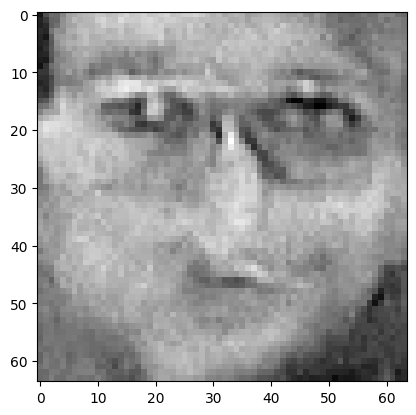

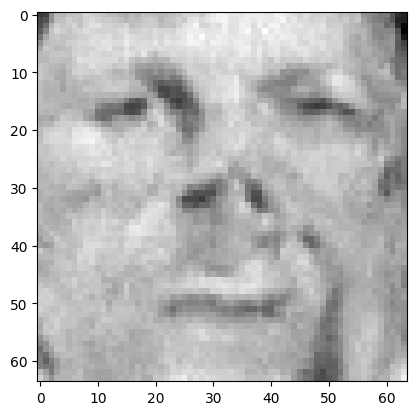

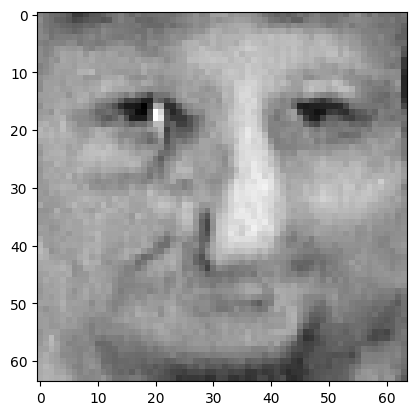

Epoch 122 : 


100%|██████████| 100/100 [00:06<00:00, 16.06it/s]


loss 0.13126661696712788
Epoch 123 : 


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


loss 0.10829367216592733
Epoch 124 : 


100%|██████████| 100/100 [00:06<00:00, 16.37it/s]


loss 0.12255627860778769
Epoch 125 : 


100%|██████████| 100/100 [00:06<00:00, 16.06it/s]


loss 0.1319540708201082
Epoch 126 : 


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


loss 0.12997031812634646
Epoch 127 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.15145356025412257
Epoch 128 : 


100%|██████████| 100/100 [00:06<00:00, 15.78it/s]


loss 0.17524232843822704
Epoch 129 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.16796578621365044
Epoch 130 : 


100%|██████████| 100/100 [00:06<00:00, 16.56it/s]


loss 0.11966189244960843
Epoch 131 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.13088850089971607
Epoch 132 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.13442302717445156
Epoch 133 : 


100%|██████████| 100/100 [00:06<00:00, 16.16it/s]


loss 0.1523334785775583
Epoch 134 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.1731037009399494
Epoch 135 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.14819248828645087
Epoch 136 : 


100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


loss 0.10444898975683743
Epoch 137 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.11521745025134877
Epoch 138 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.16612703961391276
Epoch 139 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.10110906917197296
Epoch 140 : 


100%|██████████| 100/100 [00:06<00:00, 15.84it/s]


loss 0.13005206497508504
Epoch 141 : 


100%|██████████| 100/100 [00:06<00:00, 15.63it/s]


loss 0.12511079022358515
torch.Size([3, 1, 64, 64])


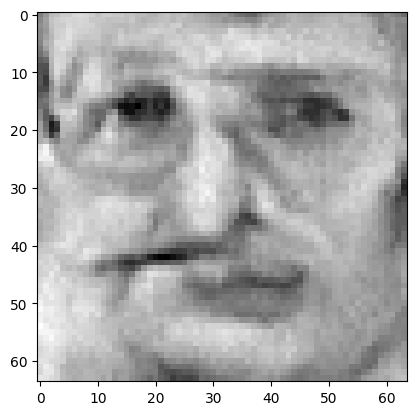

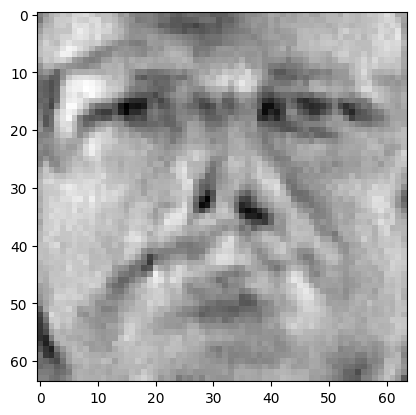

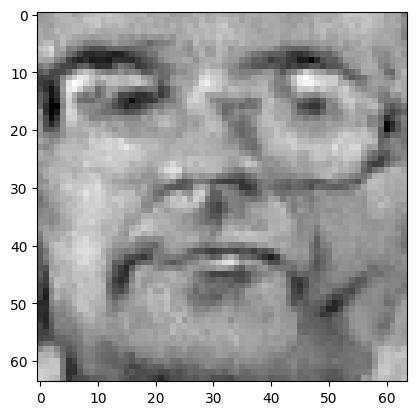

Epoch 142 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.11937457121056227
Epoch 143 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.13576172252550017
Epoch 144 : 


100%|██████████| 100/100 [00:06<00:00, 16.62it/s]


loss 0.14467379847137016
Epoch 145 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.09931311113978414
Epoch 146 : 


100%|██████████| 100/100 [00:06<00:00, 15.81it/s]


loss 0.16254517242359295
Epoch 147 : 


100%|██████████| 100/100 [00:06<00:00, 16.59it/s]


loss 0.12659916176123207
Epoch 148 : 


100%|██████████| 100/100 [00:06<00:00, 16.16it/s]


loss 0.1367087080383207
Epoch 149 : 


100%|██████████| 100/100 [00:05<00:00, 17.02it/s]


loss 0.13308879372569532
Epoch 150 : 


100%|██████████| 100/100 [00:06<00:00, 16.16it/s]


loss 0.1193631011959417
Epoch 151 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.14125353097567905
Epoch 152 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.16871595974647044
Epoch 153 : 


100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


loss 0.1920786387893815
Epoch 154 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.1256466110004368
Epoch 155 : 


100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


loss 0.12251918290281065
Epoch 156 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.1397709910011698
Epoch 157 : 


100%|██████████| 100/100 [00:05<00:00, 16.85it/s]


loss 0.1319795393437966
Epoch 158 : 


100%|██████████| 100/100 [00:06<00:00, 16.24it/s]


loss 0.13922992844271762
Epoch 159 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.13110037774805294
Epoch 160 : 


100%|██████████| 100/100 [00:06<00:00, 16.51it/s]


loss 0.1215444931960659
Epoch 161 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.12764802930511562
torch.Size([3, 1, 64, 64])


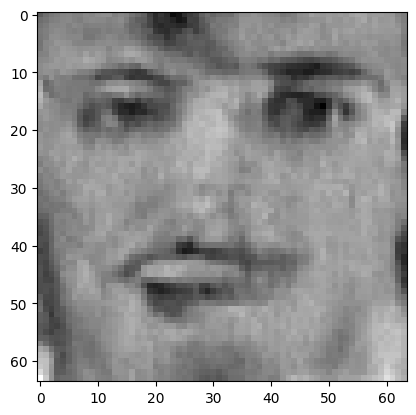

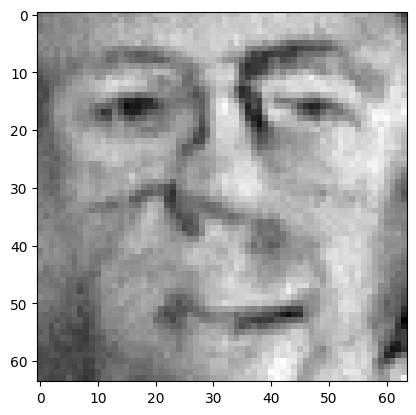

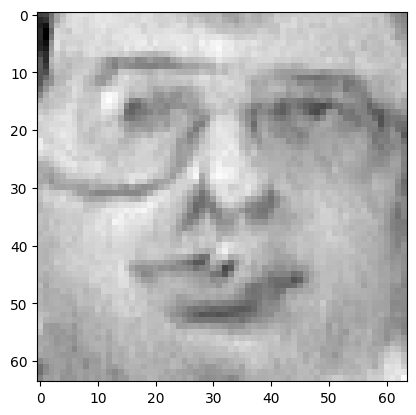

Epoch 162 : 


100%|██████████| 100/100 [00:06<00:00, 15.01it/s]


loss 0.12992031420385552
Epoch 163 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.140375514682774
Epoch 164 : 


100%|██████████| 100/100 [00:06<00:00, 16.22it/s]


loss 0.13255829565124017
Epoch 165 : 


100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


loss 0.12012397233637961
Epoch 166 : 


100%|██████████| 100/100 [00:05<00:00, 16.86it/s]


loss 0.1379292927869845
Epoch 167 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.17335606099006903
Epoch 168 : 


100%|██████████| 100/100 [00:06<00:00, 15.86it/s]


loss 0.11719702384872036
Epoch 169 : 


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


loss 0.1341117540693461
Epoch 170 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.16025096614717496
Epoch 171 : 


100%|██████████| 100/100 [00:05<00:00, 17.11it/s]


loss 0.15956235895304438
Epoch 172 : 


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


loss 0.1214502991730801
Epoch 173 : 


100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


loss 0.1643827640207078
Epoch 174 : 


100%|██████████| 100/100 [00:06<00:00, 16.51it/s]


loss 0.11745986629910252
Epoch 175 : 


100%|██████████| 100/100 [00:06<00:00, 16.66it/s]


loss 0.1469732436279593
Epoch 176 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.12055378987866189
Epoch 177 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.12313430129933389
Epoch 178 : 


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


loss 0.15436630224509834
Epoch 179 : 


100%|██████████| 100/100 [00:05<00:00, 16.86it/s]


loss 0.12082371844979395
Epoch 180 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.09450317534651553
Epoch 181 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.14401931131885834
torch.Size([3, 1, 64, 64])


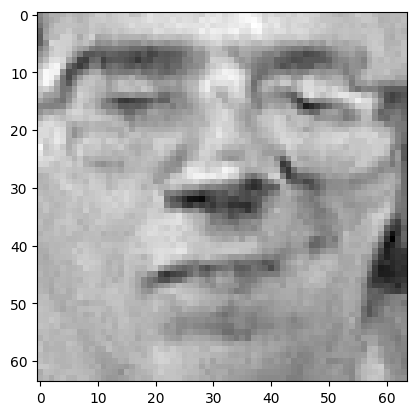

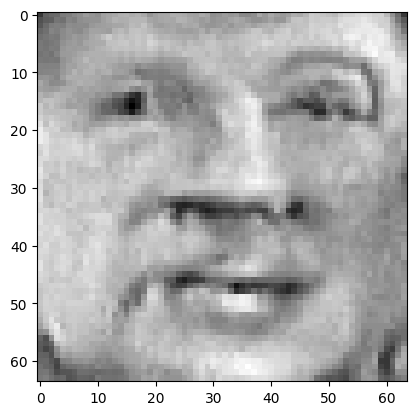

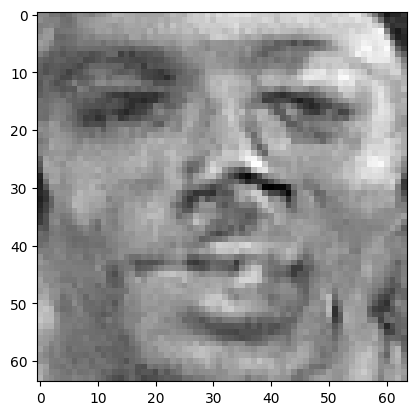

Epoch 182 : 


100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


loss 0.1454108707924643
Epoch 183 : 


100%|██████████| 100/100 [00:06<00:00, 16.23it/s]


loss 0.13663280379421802
Epoch 184 : 


100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


loss 0.12881358400178422
Epoch 185 : 


100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


loss 0.14035491631747077
Epoch 186 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.15899375151482315
Epoch 187 : 


100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


loss 0.13291035752171232
Epoch 188 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.16499904683953942
Epoch 189 : 


100%|██████████| 100/100 [00:06<00:00, 16.06it/s]


loss 0.1453543942477068
Epoch 190 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.17216527564860812
Epoch 191 : 


100%|██████████| 100/100 [00:06<00:00, 15.64it/s]


loss 0.12174317859127987
Epoch 192 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.11830345623773558
Epoch 193 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.10810946753834685
Epoch 194 : 


100%|██████████| 100/100 [00:06<00:00, 16.23it/s]


loss 0.12861692187462723
Epoch 195 : 


100%|██████████| 100/100 [00:06<00:00, 15.98it/s]


loss 0.11250459384352475
Epoch 196 : 


100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


loss 0.1639787002286453
Epoch 197 : 


100%|██████████| 100/100 [00:06<00:00, 15.52it/s]


loss 0.13362313469664
Epoch 198 : 


100%|██████████| 100/100 [00:06<00:00, 15.69it/s]


loss 0.10731232713878568
Epoch 199 : 


100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


loss 0.13655870515733629


In [8]:
train_ddpm(200, 0.0005, 1, 0.0000)

Epoch 0 : 


100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


loss 0.11007012418403604
Epoch 1 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.15796864269432165
torch.Size([3, 1, 64, 64])


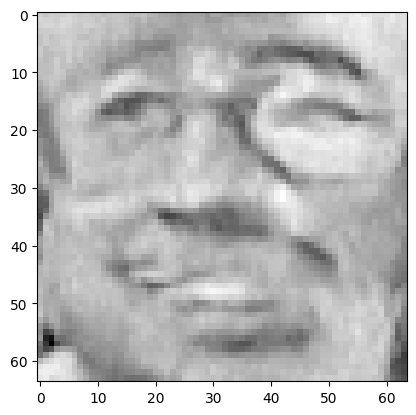

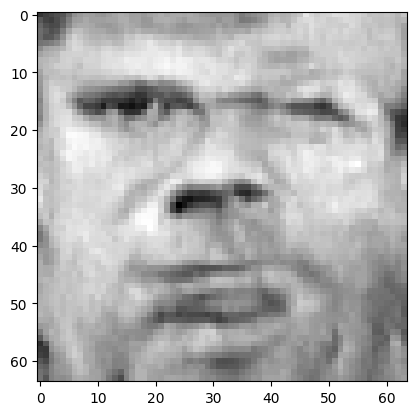

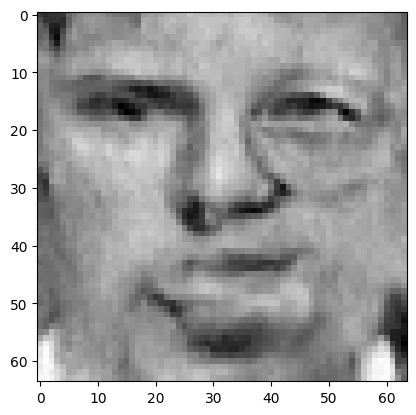

Epoch 2 : 


100%|██████████| 100/100 [00:06<00:00, 15.74it/s]


loss 0.1204651987818982
Epoch 3 : 


100%|██████████| 100/100 [00:05<00:00, 16.76it/s]


loss 0.14282929721800353
Epoch 4 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.12416331692392038
Epoch 5 : 


100%|██████████| 100/100 [00:06<00:00, 16.18it/s]


loss 0.11697954802349401
Epoch 6 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.1280072438028491
Epoch 7 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.11240168691537972
Epoch 8 : 


100%|██████████| 100/100 [00:06<00:00, 16.64it/s]


loss 0.15074417930012918
Epoch 9 : 


100%|██████████| 100/100 [00:06<00:00, 15.70it/s]


loss 0.11616136627475562
Epoch 10 : 


100%|██████████| 100/100 [00:06<00:00, 16.41it/s]


loss 0.14113978643036423
Epoch 11 : 


100%|██████████| 100/100 [00:06<00:00, 16.31it/s]


loss 0.12692292636360308
Epoch 12 : 


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


loss 0.1440329366310174
Epoch 13 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.11468332153795088
Epoch 14 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.14569006847627852
Epoch 15 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.14550073368757613
Epoch 16 : 


100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


loss 0.15058481430707132
Epoch 17 : 


100%|██████████| 100/100 [00:05<00:00, 16.77it/s]


loss 0.11738499189657187
Epoch 18 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.12872556299380505
Epoch 19 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.13071854283291762
Epoch 20 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.14651264431645006
Epoch 21 : 


100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


loss 0.13524531304375154
torch.Size([3, 1, 64, 64])


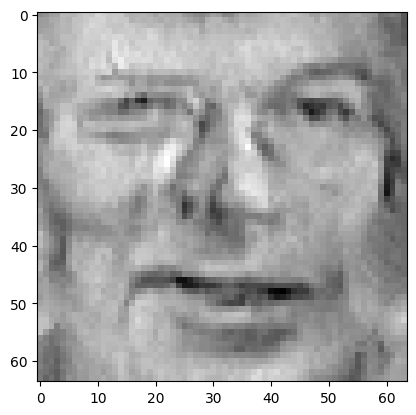

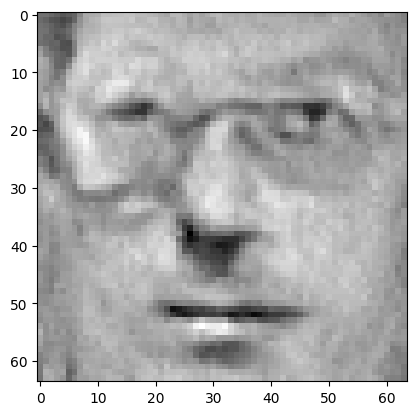

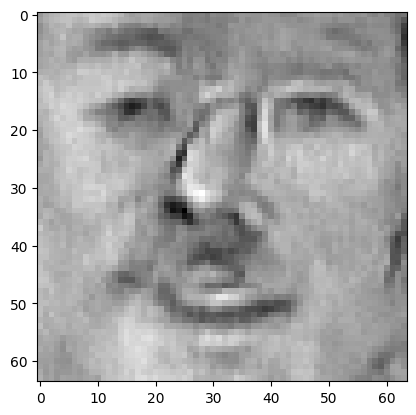

Epoch 22 : 


100%|██████████| 100/100 [00:06<00:00, 15.86it/s]


loss 0.10521321163711277
Epoch 23 : 


100%|██████████| 100/100 [00:06<00:00, 15.90it/s]


loss 0.09514635795333504
Epoch 24 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.16786821497328747
Epoch 25 : 


100%|██████████| 100/100 [00:06<00:00, 16.62it/s]


loss 0.11206287830695323
Epoch 26 : 


100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


loss 0.15036127006888553
Epoch 27 : 


100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


loss 0.16881501171132263
Epoch 28 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.0966631053842647
Epoch 29 : 


100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


loss 0.12702266356282776
Epoch 30 : 


100%|██████████| 100/100 [00:06<00:00, 16.31it/s]


loss 0.12495736955506714
Epoch 31 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.13004735362674927
Epoch 32 : 


100%|██████████| 100/100 [00:06<00:00, 15.83it/s]


loss 0.12113604101234503
Epoch 33 : 


100%|██████████| 100/100 [00:06<00:00, 16.22it/s]


loss 0.1368336519970194
Epoch 34 : 


100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


loss 0.11689590727967991
Epoch 35 : 


100%|██████████| 100/100 [00:06<00:00, 16.42it/s]


loss 0.13642414674726006
Epoch 36 : 


100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


loss 0.1309650764901228
Epoch 37 : 


100%|██████████| 100/100 [00:06<00:00, 16.54it/s]


loss 0.12431401153115013
Epoch 38 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.14007349391954027
Epoch 39 : 


100%|██████████| 100/100 [00:06<00:00, 15.65it/s]


loss 0.13764374167105844
Epoch 40 : 


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


loss 0.17964403868179177
Epoch 41 : 


100%|██████████| 100/100 [00:06<00:00, 15.75it/s]


loss 0.10974329097006924
torch.Size([3, 1, 64, 64])


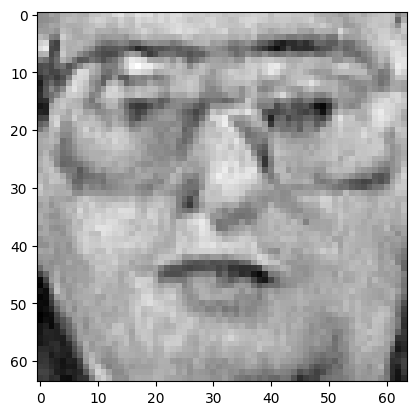

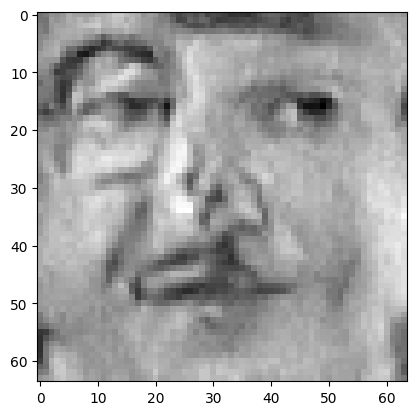

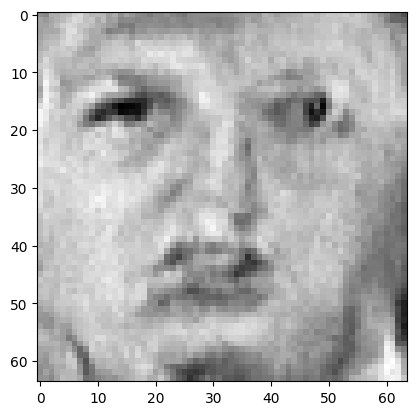

Epoch 42 : 


100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


loss 0.14400649848190553
Epoch 43 : 


100%|██████████| 100/100 [00:06<00:00, 15.84it/s]


loss 0.14815283487494696
Epoch 44 : 


100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


loss 0.12623124890551862
Epoch 45 : 


100%|██████████| 100/100 [00:05<00:00, 16.84it/s]


loss 0.13054544631480655
Epoch 46 : 


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


loss 0.13626716389027688
Epoch 47 : 


100%|██████████| 100/100 [00:06<00:00, 16.18it/s]


loss 0.11599102812387413
Epoch 48 : 


100%|██████████| 100/100 [00:06<00:00, 15.46it/s]


loss 0.1128268561897638
Epoch 49 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.11807726601965605
Epoch 50 : 


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


loss 0.14137359305273514
Epoch 51 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.14093239630399318
Epoch 52 : 


100%|██████████| 100/100 [00:06<00:00, 15.57it/s]


loss 0.1470946728653196
Epoch 53 : 


100%|██████████| 100/100 [00:06<00:00, 16.52it/s]


loss 0.1563406859424921
Epoch 54 : 


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


loss 0.13228406789365757
Epoch 55 : 


100%|██████████| 100/100 [00:06<00:00, 15.78it/s]


loss 0.1598984388738432
Epoch 56 : 


100%|██████████| 100/100 [00:06<00:00, 15.83it/s]


loss 0.12086067332572714
Epoch 57 : 


100%|██████████| 100/100 [00:06<00:00, 16.49it/s]


loss 0.1194518283746094
Epoch 58 : 


100%|██████████| 100/100 [00:06<00:00, 16.32it/s]


loss 0.12207475814140226
Epoch 59 : 


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


loss 0.11295180738725608
Epoch 60 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.12006844396389706
Epoch 61 : 


100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


loss 0.1583659502352519
torch.Size([3, 1, 64, 64])


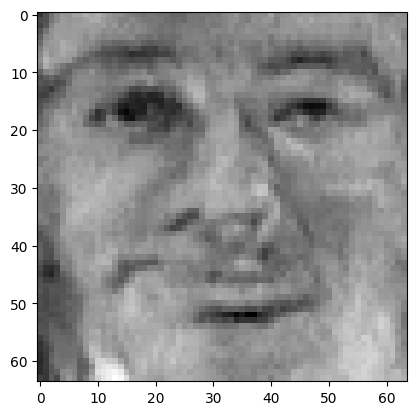

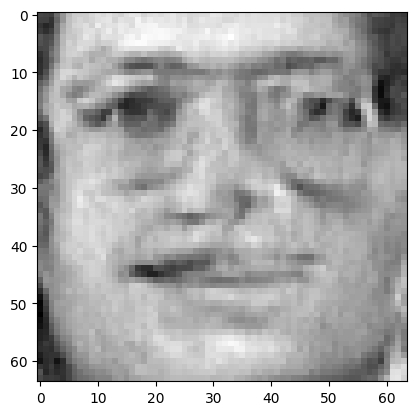

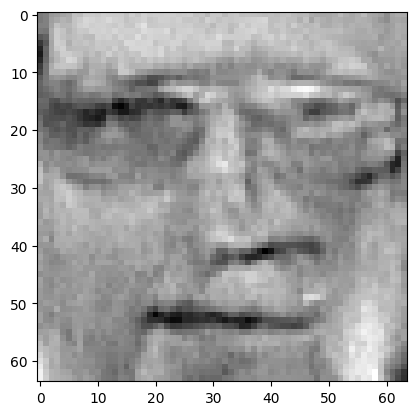

Epoch 62 : 


100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


loss 0.12818311050025505
Epoch 63 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.12670868135658883
Epoch 64 : 


100%|██████████| 100/100 [00:06<00:00, 16.06it/s]


loss 0.12895741954555034
Epoch 65 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.1095473287526593
Epoch 66 : 


100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


loss 0.1485113397658934
Epoch 67 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.14359005458179966
Epoch 68 : 


100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


loss 0.12171960182788084
Epoch 69 : 


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


loss 0.13764205535746393
Epoch 70 : 


100%|██████████| 100/100 [00:06<00:00, 15.90it/s]


loss 0.11536393628995047
Epoch 71 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.10778254524799794
Epoch 72 : 


100%|██████████| 100/100 [00:06<00:00, 16.32it/s]


loss 0.1164641541959039
Epoch 73 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.10852699001079974
Epoch 74 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.14943663388419381
Epoch 75 : 


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


loss 0.15041871203204937
Epoch 76 : 


100%|██████████| 100/100 [00:06<00:00, 16.22it/s]


loss 0.14736030917670678
Epoch 77 : 


100%|██████████| 100/100 [00:06<00:00, 15.45it/s]


loss 0.12479346684309389
Epoch 78 : 


100%|██████████| 100/100 [00:06<00:00, 16.53it/s]


loss 0.13212320696254323
Epoch 79 : 


100%|██████████| 100/100 [00:06<00:00, 16.51it/s]


loss 0.13577448431578837
Epoch 80 : 


100%|██████████| 100/100 [00:06<00:00, 15.62it/s]


loss 0.12327040855779514
Epoch 81 : 


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


loss 0.16058543964838867
torch.Size([3, 1, 64, 64])


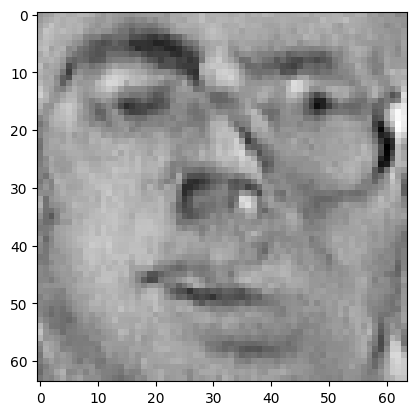

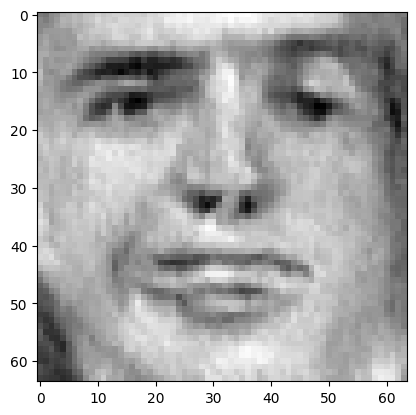

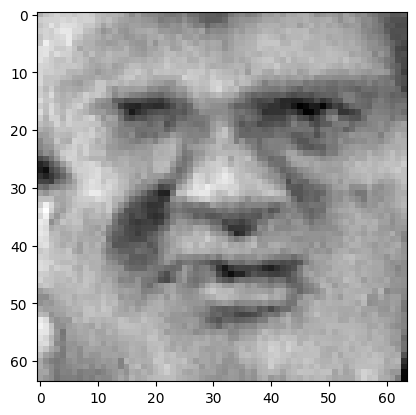

Epoch 82 : 


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


loss 0.1132944362460787
Epoch 83 : 


100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


loss 0.13297112097774974
Epoch 84 : 


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


loss 0.14643259664834746
Epoch 85 : 


100%|██████████| 100/100 [00:06<00:00, 15.50it/s]


loss 0.15027680211920816
Epoch 86 : 


100%|██████████| 100/100 [00:05<00:00, 16.92it/s]


loss 0.15073777665167654
Epoch 87 : 


100%|██████████| 100/100 [00:06<00:00, 15.55it/s]


loss 0.1436355258806868
Epoch 88 : 


100%|██████████| 100/100 [00:06<00:00, 15.21it/s]


loss 0.08652600367203156
Epoch 89 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.1107534572105898
Epoch 90 : 


100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


loss 0.12691721304692102
Epoch 91 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.11781754832084353
Epoch 92 : 


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


loss 0.11786595624735827
Epoch 93 : 


100%|██████████| 100/100 [00:06<00:00, 16.12it/s]


loss 0.12356088546865782
Epoch 94 : 


100%|██████████| 100/100 [00:06<00:00, 15.76it/s]


loss 0.1620209701686248
Epoch 95 : 


100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


loss 0.10210735496300409
Epoch 96 : 


100%|██████████| 100/100 [00:06<00:00, 15.67it/s]


loss 0.1273581833038502
Epoch 97 : 


100%|██████████| 100/100 [00:06<00:00, 15.75it/s]


loss 0.11025509010539482
Epoch 98 : 


100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


loss 0.1390487205560638
Epoch 99 : 


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


loss 0.14566706014818243
Epoch 100 : 


100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


loss 0.17125840254219135
Epoch 101 : 


100%|██████████| 100/100 [00:05<00:00, 16.78it/s]


loss 0.16645247481916722
torch.Size([3, 1, 64, 64])


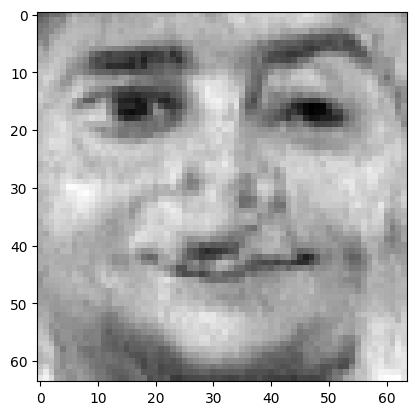

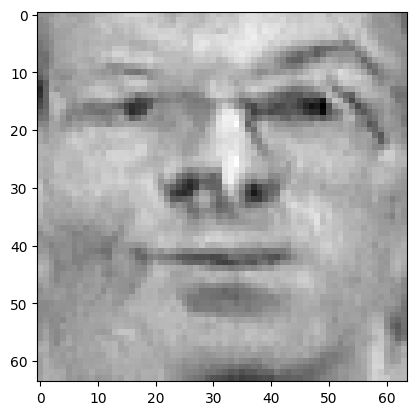

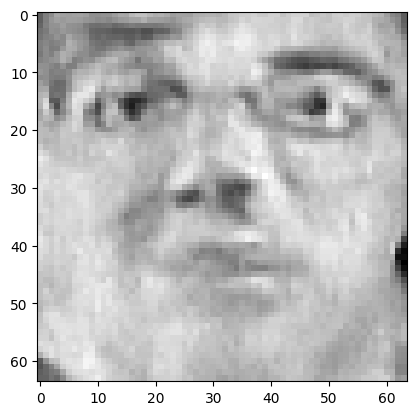

Epoch 102 : 


100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


loss 0.11277771375598684
Epoch 103 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.1050426212085476
Epoch 104 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.13546130815412763
Epoch 105 : 


100%|██████████| 100/100 [00:06<00:00, 16.36it/s]


loss 0.15112406931681324
Epoch 106 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.13276355372370008
Epoch 107 : 


100%|██████████| 100/100 [00:06<00:00, 16.53it/s]


loss 0.14225781787385755
Epoch 108 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.12193542981708479
Epoch 109 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.12016447155053976
Epoch 110 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.11433348324017026
Epoch 111 : 


100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


loss 0.14277328851572854
Epoch 112 : 


100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


loss 0.14775113479620727
Epoch 113 : 


100%|██████████| 100/100 [00:06<00:00, 16.48it/s]


loss 0.10268324454277013
Epoch 114 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.11779809588177129
Epoch 115 : 


100%|██████████| 100/100 [00:05<00:00, 16.78it/s]


loss 0.10727773658579767
Epoch 116 : 


100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


loss 0.11975523512235901
Epoch 117 : 


100%|██████████| 100/100 [00:06<00:00, 16.44it/s]


loss 0.10757577399688077
Epoch 118 : 


100%|██████████| 100/100 [00:06<00:00, 16.52it/s]


loss 0.09800676513406664
Epoch 119 : 


100%|██████████| 100/100 [00:06<00:00, 15.70it/s]


loss 0.14847505350995338
Epoch 120 : 


100%|██████████| 100/100 [00:06<00:00, 15.14it/s]


loss 0.10036546653928294
Epoch 121 : 


100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


loss 0.11442017835064984
torch.Size([3, 1, 64, 64])


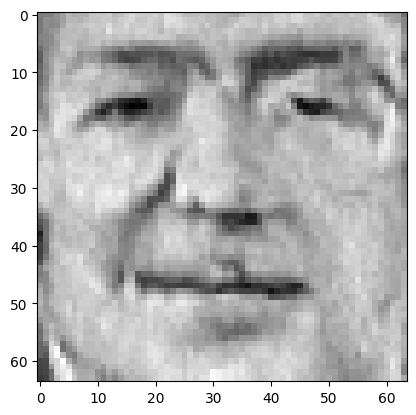

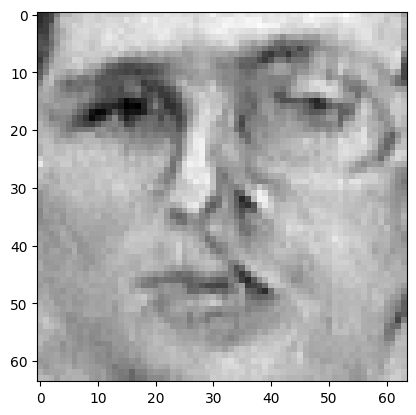

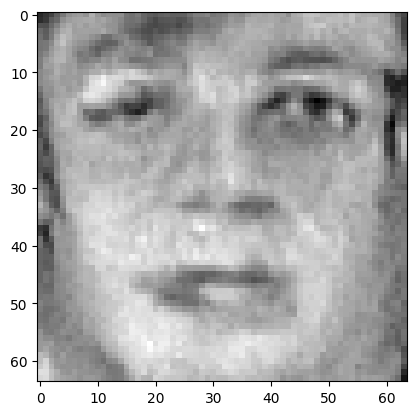

Epoch 122 : 


100%|██████████| 100/100 [00:06<00:00, 15.36it/s]


loss 0.11068416865553476
Epoch 123 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.12008826978519775
Epoch 124 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.16213759073821493
Epoch 125 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.1299700989783592
Epoch 126 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.11472384723237793
Epoch 127 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.14960288654838988
Epoch 128 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.16909553532500565
Epoch 129 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.1183631540919679
Epoch 130 : 


100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


loss 0.12878716257177814
Epoch 131 : 


100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


loss 0.14803969272479947
Epoch 132 : 


100%|██████████| 100/100 [00:06<00:00, 15.70it/s]


loss 0.11744536244105451
Epoch 133 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.16871025375180473
Epoch 134 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.1177774063816032
Epoch 135 : 


100%|██████████| 100/100 [00:06<00:00, 15.43it/s]


loss 0.10222042033363427
Epoch 136 : 


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


loss 0.1629113157503906
Epoch 137 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.11183769760453602
Epoch 138 : 


100%|██████████| 100/100 [00:06<00:00, 15.94it/s]


loss 0.1223337605705642
Epoch 139 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.11783048445286326
Epoch 140 : 


100%|██████████| 100/100 [00:06<00:00, 15.97it/s]


loss 0.1589283544275104
Epoch 141 : 


100%|██████████| 100/100 [00:06<00:00, 16.31it/s]


loss 0.11284928548697815
torch.Size([3, 1, 64, 64])


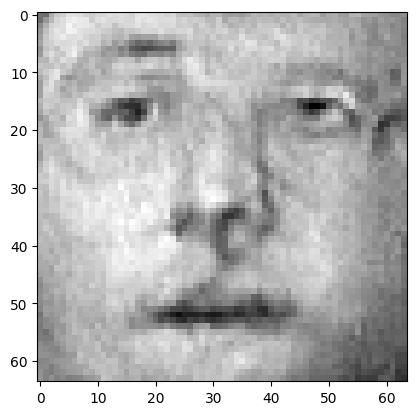

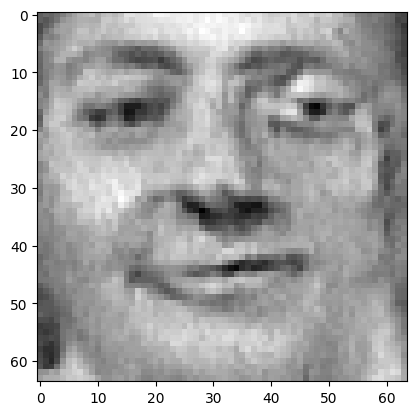

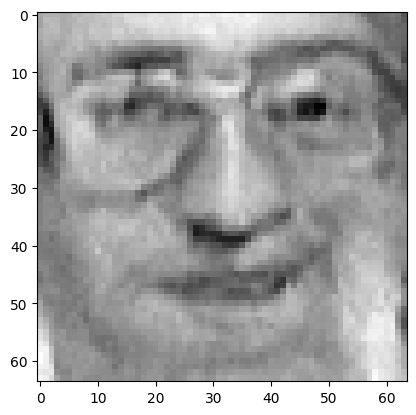

Epoch 142 : 


100%|██████████| 100/100 [00:06<00:00, 16.12it/s]


loss 0.11904591516522409
Epoch 143 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.11898598374951849
Epoch 144 : 


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


loss 0.13699754945390571
Epoch 145 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.11511097663135217
Epoch 146 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.1254563567799465
Epoch 147 : 


100%|██████████| 100/100 [00:06<00:00, 16.33it/s]


loss 0.11773642446866855
Epoch 148 : 


100%|██████████| 100/100 [00:05<00:00, 16.79it/s]


loss 0.11962628920241837
Epoch 149 : 


100%|██████████| 100/100 [00:06<00:00, 16.54it/s]


loss 0.1168415108395485
Epoch 150 : 


100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


loss 0.12408627471837513
Epoch 151 : 


100%|██████████| 100/100 [00:06<00:00, 16.35it/s]


loss 0.11117597840220365
Epoch 152 : 


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


loss 0.16418413272619853
Epoch 153 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.1414046120352188
Epoch 154 : 


100%|██████████| 100/100 [00:05<00:00, 16.76it/s]


loss 0.12225996749466317
Epoch 155 : 


100%|██████████| 100/100 [00:06<00:00, 16.26it/s]


loss 0.11210683830604119
Epoch 156 : 


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


loss 0.1549663234002273
Epoch 157 : 


100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


loss 0.14809908689538984
Epoch 158 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.11863991976607466
Epoch 159 : 


100%|██████████| 100/100 [00:05<00:00, 16.73it/s]


loss 0.12834582303324146
Epoch 160 : 


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


loss 0.11831488375793908
Epoch 161 : 


100%|██████████| 100/100 [00:06<00:00, 15.78it/s]


loss 0.15674732777784733
torch.Size([3, 1, 64, 64])


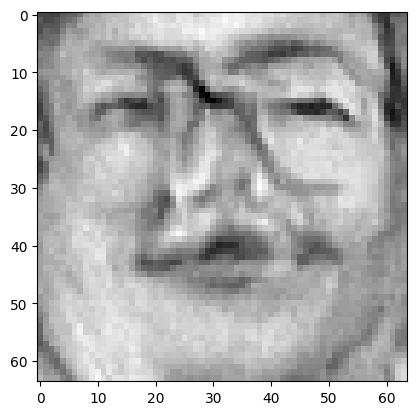

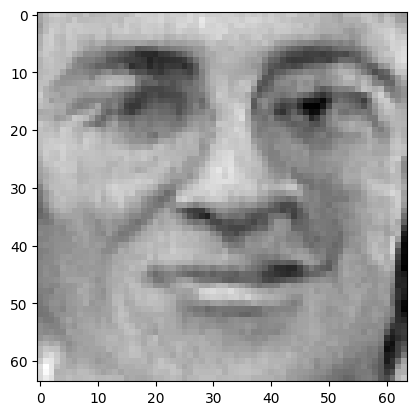

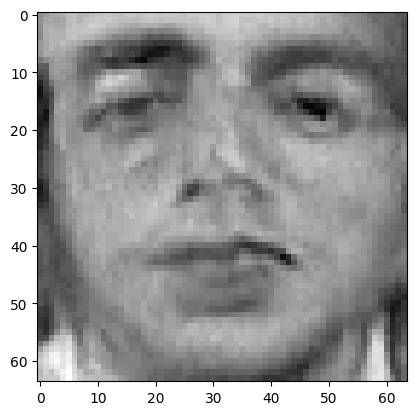

Epoch 162 : 


100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


loss 0.11598114930442338
Epoch 163 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.103364979281635
Epoch 164 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.1155770189492685
Epoch 165 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.15771729152669717
Epoch 166 : 


100%|██████████| 100/100 [00:06<00:00, 15.75it/s]


loss 0.11596507277256016
Epoch 167 : 


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


loss 0.10814921197465932
Epoch 168 : 


100%|██████████| 100/100 [00:06<00:00, 16.38it/s]


loss 0.12025362047859577
Epoch 169 : 


100%|██████████| 100/100 [00:06<00:00, 16.44it/s]


loss 0.11040753982767608
Epoch 170 : 


100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


loss 0.11586915675316048
Epoch 171 : 


100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


loss 0.11242833264617955
Epoch 172 : 


100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


loss 0.1101334617641957
Epoch 173 : 


100%|██████████| 100/100 [00:06<00:00, 15.86it/s]


loss 0.10746359203935937
Epoch 174 : 


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


loss 0.13556226336080973
Epoch 175 : 


100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


loss 0.11637145031104709
Epoch 176 : 


100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


loss 0.12332896502469573
Epoch 177 : 


100%|██████████| 100/100 [00:06<00:00, 15.98it/s]


loss 0.14647847224604751
Epoch 178 : 


100%|██████████| 100/100 [00:06<00:00, 16.57it/s]


loss 0.1291747614314118
Epoch 179 : 


100%|██████████| 100/100 [00:05<00:00, 16.76it/s]


loss 0.15113368386890177
Epoch 180 : 


100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


loss 0.1069021315072206
Epoch 181 : 


100%|██████████| 100/100 [00:06<00:00, 16.32it/s]


loss 0.14671150849903855
torch.Size([3, 1, 64, 64])


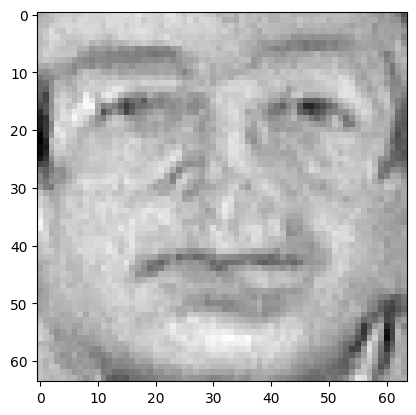

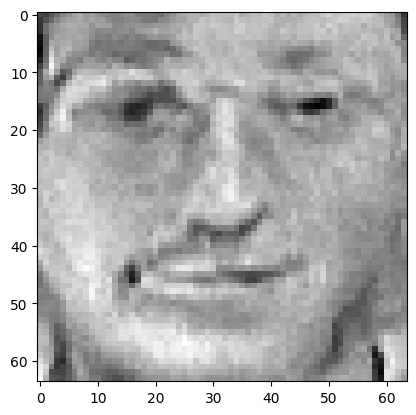

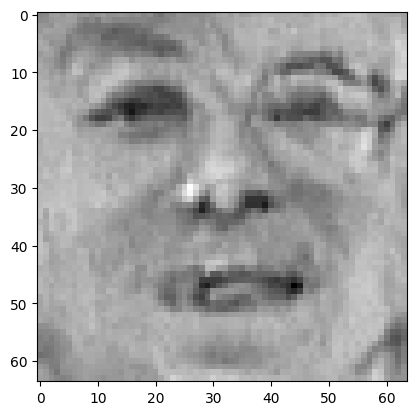

Epoch 182 : 


100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


loss 0.1103000903256069
Epoch 183 : 


100%|██████████| 100/100 [00:06<00:00, 16.06it/s]


loss 0.14841596802074086
Epoch 184 : 


100%|██████████| 100/100 [00:06<00:00, 16.49it/s]


loss 0.11480463993236294
Epoch 185 : 


100%|██████████| 100/100 [00:05<00:00, 16.81it/s]


loss 0.13151024249725
Epoch 186 : 


100%|██████████| 100/100 [00:06<00:00, 16.28it/s]


loss 0.13120966003567075
Epoch 187 : 


100%|██████████| 100/100 [00:06<00:00, 16.21it/s]


loss 0.13036915067752536
Epoch 188 : 


100%|██████████| 100/100 [00:06<00:00, 16.65it/s]


loss 0.1436600255072118
Epoch 189 : 


100%|██████████| 100/100 [00:06<00:00, 15.74it/s]


loss 0.11555109633323107
Epoch 190 : 


100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


loss 0.11006187747980065
Epoch 191 : 


100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


loss 0.11851175332423916
Epoch 192 : 


100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


loss 0.12289877330222276
Epoch 193 : 


100%|██████████| 100/100 [00:05<00:00, 16.67it/s]


loss 0.13477584897440673
Epoch 194 : 


100%|██████████| 100/100 [00:06<00:00, 16.10it/s]


loss 0.12324637579370726
Epoch 195 : 


100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


loss 0.12565675340490834
Epoch 196 : 


100%|██████████| 100/100 [00:06<00:00, 15.70it/s]


loss 0.12106290616155435
Epoch 197 : 


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


loss 0.11112259563051137
Epoch 198 : 


100%|██████████| 100/100 [00:05<00:00, 17.09it/s]


loss 0.11303769076802668
Epoch 199 : 


100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


loss 0.09476357157237807


In [9]:
train_ddpm(200, 0.0005, 0.99, 0.0000)